In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = '../results/results.csv'
df = pd.read_csv(data_path, delimiter='\t')
ray = df['Ray_et_al'].to_numpy()
matrixreduce = df['MatrixREDUCE'].to_numpy()
rnacontext = df['RNAcontext'].to_numpy()
deepbind = df['DeepBind'].to_numpy()
dlprb = df['DLPRB'].to_numpy()
rck = df['RCK'].to_numpy()
cdeepbind = df['cDeepbind'].to_numpy()
thermonet = df['ThermoNet'].to_numpy()
residualbind = df['ResidualBind'].to_numpy()

# Plot box-violin plot

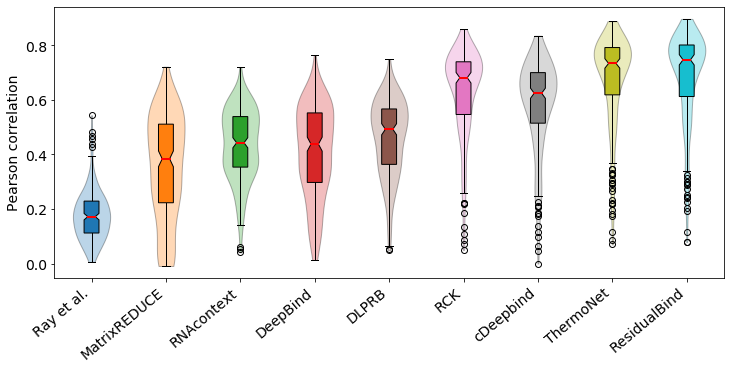

In [79]:
names = ['Ray et al.', 'MatrixREDUCE', 'RNAcontext', 'DeepBind', 'DLPRB', 'RCK', 'cDeepbind', 'ThermoNet', 'ResidualBind']
data = [ray, matrixreduce, rnacontext, deepbind, rck, dlprb, cdeepbind, thermonet, residualbind]

fig = plt.figure(figsize=(12,5))
vplot = plt.violinplot(data, 
                       showextrema=False);

data = [ray, matrixreduce, rnacontext, deepbind, rck, dlprb, cdeepbind, thermonet, residualbind]


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='tab10')
test_mean = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


    
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(data, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
plt.xticks(range(1,len(names)+1), names, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

# plot comparison between ResidualBind and ThermoNet

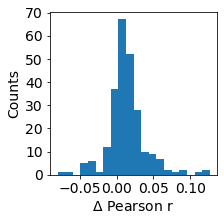

In [16]:

fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.hist(residualbind-thermonet, bins=20);

plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Counts', fontsize=14);
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.xlabel('$\Delta$ Pearson r', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_hist.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


In [25]:
from scipy import stats
stats.wilcoxon(residualbind, thermonet)

WilcoxonResult(statistic=5055.5, pvalue=3.222246569244905e-19)

# Compare performance based on binding score normalization and different input features

In [3]:
data_path = '../results/rnacompete_2013/clip_norm_seq_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
clip_norm_seq = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2013/clip_norm_pu_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
clip_norm_pu = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2013/clip_norm_struct_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
clip_norm_struct = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2013/log_norm_seq_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
log_norm_seq = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2013/log_norm_pu_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
log_norm_pu = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2013/log_norm_struct_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
log_norm_struct = df['Pearson score'].to_numpy()

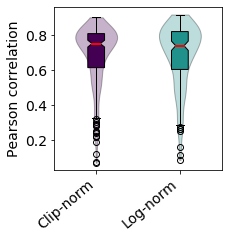

In [5]:
names = ['Clip-norm', 'Log-norm']
data = [clip_norm_seq, log_norm_seq]

fig = plt.figure(figsize=(3,3))
vplot = plt.violinplot(data, 
                       showextrema=False);


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='viridis')
test_mean = [0.1,  0.5,  0.9]

   
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(data, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
plt.xticks(range(1,len(names)+1), names, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_clip_vs_log.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

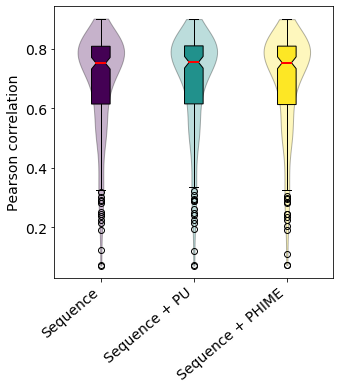

In [4]:
names = ['Sequence', 'Sequence + PU', 'Sequence + PHIME']
data = [clip_norm_seq, clip_norm_pu, clip_norm_struct]

fig = plt.figure(figsize=(5,5))
vplot = plt.violinplot(data, 
                       showextrema=False);


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='viridis')
test_mean = [0.1,  0.5,  0.9]

   
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(data, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
plt.xticks(range(1,len(names)+1), names, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_clip_structure.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

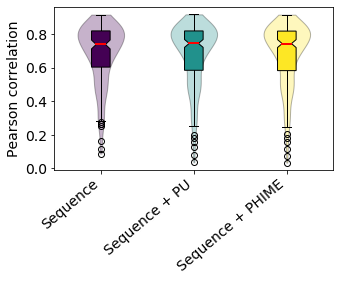

In [10]:
names = ['Sequence', 'Sequence + PU', 'Sequence + PHIME']
data = [log_norm_seq, log_norm_pu, log_norm_struct]

fig = plt.figure(figsize=(5,3))
vplot = plt.violinplot(data, 
                       showextrema=False);


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='viridis')
test_mean = [0.1,  0.5,  0.9]

   
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(data, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
plt.xticks(range(1,len(names)+1), names, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_log_structure.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

In [7]:
data = [clip_norm_seq, clip_norm_pu, clip_norm_struct, log_norm_seq, log_norm_pu, log_norm_struct]
name = ['clip_norm_seq', 'clip_norm_pu', 'clip_norm_struct', 'log_norm_seq', 'log_norm_pu', 'log_norm_struct']

for n,x in zip(name, data):
    print(n, np.mean(x), np.std(x))


clip_norm_seq 0.688619262295082 0.16975689898179339
clip_norm_pu 0.690047131147541 0.17045535408919055
clip_norm_struct 0.6886290983606558 0.17097206323661115
log_norm_seq 0.6862725609756097 0.17848520377502483
log_norm_pu 0.6837483606557376 0.18308362249306023
log_norm_struct 0.6827598360655739 0.1832164039652027


# compare PHIME vs seq only

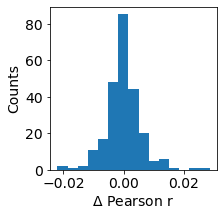

In [9]:
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.hist(clip_norm_seq-clip_norm_struct, bins=15)

plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Counts', fontsize=14);
plt.setp(ax.get_xticklabels(),fontsize=14)
plt.xlabel('$\Delta$ Pearson r', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_hist_seq_vs_struct.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

# 2009 RNAcompete analysis

In [33]:
data_path = '../results/rnacompete_2009/log_norm_seq_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
log_norm_seq = df['Pearson score'].to_numpy()

data_path = '../results/rnacompete_2009/log_norm_pu_performance.tsv'
df = pd.read_csv(data_path, delimiter='\t')
log_norm_pu = df['Pearson score'].to_numpy()


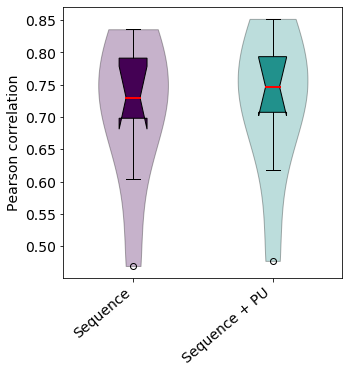

In [35]:
names = ['Sequence', 'Sequence + PU']
data = [log_norm_seq, log_norm_pu]

fig = plt.figure(figsize=(5,5))
vplot = plt.violinplot(data, 
                       showextrema=False);


import matplotlib.cm as cm
cmap = cm.ScalarMappable(cmap='viridis')
test_mean = [0.1,  0.5,  0.9]

   
for patch, color in zip(vplot['bodies'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    

medianprops = dict(color="red",linewidth=2)
    
bplot = plt.boxplot(data, 
                    notch=True, patch_artist=True, 
                    widths=0.2,
                    medianprops=medianprops);

for patch, color in zip(bplot['boxes'], cmap.to_rgba(test_mean)):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    #patch.set(color=colors[i])
plt.xticks(range(1,len(names)+1), names, rotation=40, fontsize=14, ha='right');
ax = plt.gca();
plt.setp(ax.get_yticklabels(),fontsize=14)
plt.ylabel('Pearson correlation', fontsize=14);


plot_path = '../results/rnacompete_2013/'
outfile = os.path.join(plot_path, 'Performance_comparison_log_structure_2009.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

# Compare log vs clip as a scatter plot

In [ ]:

data_path = '../data/RNAcompete_2013/rnacompete2013.h5'
results_path = helper.make_directory('../results', 'rnacompete_2013')

experiment = 'RNCMPT00169'
rbp_index = helper.find_experiment_index(data_path, experiment)


In [ ]:
normalization = 'clip_norm'   # 'log_norm' or 'clip_norm'
ss_type = 'seq'                  # 'seq', 'pu', or 'struct'
save_path = helper.make_directory(results_path, normalization+'_'+ss_type)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# get predictions for test sequences
predictions_clip = model.predict(test['inputs'])
y = test['targets']


fig = plt.figure(figsize=(3,3))
plt.scatter(predictions_clip, y, alpha=0.5, rasterized=True)
plt.plot([-2,9],[-2,9],'--k')
plt.xlabel('Predicted binding scores', fontsize=14)
plt.ylabel('Experimental binding scores', fontsize=14)
plt.xticks([-2, 0, 2, 4, 6, 8], fontsize=14)
plt.yticks([-2, 0, 2, 4, 6, 8], fontsize=14)
outfile = os.path.join(results_path, experiment+'_scatter_clip.pdf')
fig.savefig(outfile, format='pdf', dpi=600, bbox_inches='tight')


In [ ]:
normalization = 'log_norm'   # 'log_norm' or 'clip_norm'
ss_type = 'seq'                  # 'seq', 'pu', or 'struct'
save_path = helper.make_directory(results_path, normalization+'_'+ss_type)

# load rbp dataset
train, valid, test = helper.load_rnacompete_data(data_path, 
                                                 ss_type=ss_type, 
                                                 normalization=normalization, 
                                                 rbp_index=rbp_index)

# load residualbind model
input_shape = list(train['inputs'].shape)[1:]
weights_path = os.path.join(save_path, experiment + '_weights.hdf5')    
model = ResidualBind(input_shape, weights_path)

# load pretrained weights
model.load_weights()

# get predictions for test sequences
predictions_log = model.predict(test['inputs'])

y2 = test['targets']


fig = plt.figure(figsize=(3,3))
plt.scatter(predictions_log, y2, alpha=0.5, rasterized=True)
plt.plot([-2,9],[-2,9],'--k')
plt.xlabel('Predicted binding scores', fontsize=14)
plt.ylabel('Experimental binding scores', fontsize=14)
plt.xticks([-2, 0, 2, 4, 6, 8,], fontsize=14)
plt.yticks([-2, 0, 2, 4, 6, 8], fontsize=14)
outfile = os.path.join(results_path, experiment+'_scatter_log.pdf')
fig.savefig(outfile, format='pdf', dpi=600, bbox_inches='tight')

